<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221025_5%EC%97%AD%EC%A0%84%ED%8C%8C(_backword_propagation_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 역전파 ( backword-propagation )

- 순전파를 거꾸로하면서 각 bias와 가중치의 오차를 역방향으로 수정해나가면서 전파함 -> 러닝

-  출력값과 정답의 오차를 네트워크에서 역전파시켜 네트워크의 가중치와 bias를 최
적화시킴

- 순전파(forward propagation)로 얻은 출력값과 정답과의 오차를 하나씩 층을 거슬
러 올라가면서 역방향으로 전파

- 이 때 전파시킨 오차에 근거해 각 층의 가중치와 bias의 수정량을 계산

- 모든 층의 가중치와 bias를 조금씩 수정

- 위 과정을 반복하면 네트워크가 최적화(학습)



# < 역전파 이해를 위한 항목>
- 훈련 데이터, 테스트 데이터
- 손실 함수
- 경사 하강법
- 최적화 알고리즘
- 배치

# 2. 훈련 데이터, 테스트 데이터

- 훈련 데이터 - 신경망이 학습에 이용되는 데이터
- 테스트 데이터 - 학습 결과의 검증에 사용되는 데이터
- 각 데이터는 여러 개의 입력값(feature)과 정답으로 구성
- 입력값과 정답 한 쌍을 샘플이라 칭함
- 일반적으로 훈련 데이터의 샘플수가 테스트 데이터의 샘플수보다 월등히 많음
- 훈련 데이터로 학습이 제대로 된 신경망의 경우, 테스트 데이터에서 좋은 결과가 나
옴
- 회귀문제의 경우 정답은 다음과 같이 여러 개의 값을 가진 벡터로 나타냄
[0.23, -1.23, 5.44]
- 분류 문제의 경우 다음 처럼 원핫인코딩 형태로 표현
[0, 0, 1]

- 지도학습 ( 수퍼바이저 러닝 ) 위주로 할 것

- 비지도학습 ( 언수퍼바이저 러닝 ) - 질문할것. ( ex: 인스타모든사진을 가지고 이것이 옆모습이다, 뒷모습이다를 러닝시키지 않고 어떻게 옆모습인지뒷모습인지 특정할 수 있나 ? )

# 1. 회귀 ( Regression )

- 모든 + 오차와 - 오차를 다 더하면 0에 수렴할 것이다.  -> 오차가 0로 수렴하므로 대표함수를 설정할 수 있다. -> 회귀함수

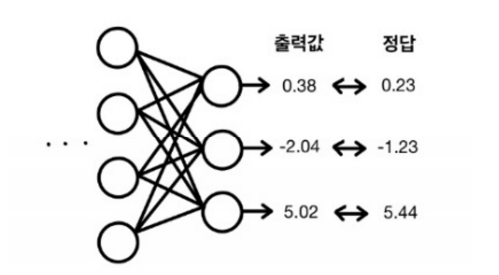)

# 2. 분류 

- 왼쪽은 0이다, 오른쪽은 1이다 분류해놓고 새로운 값을 받았을 때, 어느 쪽인지 판단해서 0과1 중에 정답을 출력해냄



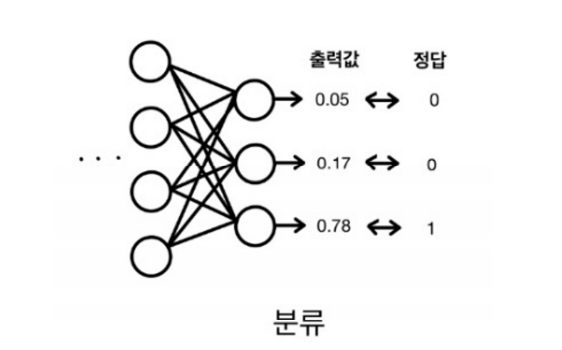

# 3. 손실함수(loss function)
- 출력값과 정답의 오차를 정의하는 함수

- 1) 평균제곱오차 - MSE(Mean squared error) 
- 회귀문제에 주로 사용

import numpy as np
def mean_squared_error(y, t):
return np.sum(np.power(y ­ t, 2)) / y.shape[0]

- 2) 오차제곱합 ­ SSE(Sum of Squares for Error)
- 회귀문제에 주로 사용

import numpy as np
def square_sum(y, t):
return 1.0/2.0 * np.sum(np.square(y ­ t))
- 1/2 로 나눈 이유는 미분계산을 수월하게 하기 위함

- 3) 교차 엔트로피(Cross Entropy)
- 분류 문제에 사용
- 분류 문제에서 정답은 1이 하나이고 나머지는 모두 0인 원핫인코딩 벡터로 표현
- 따라서 우변의 시그마 내부에서 t 가 1인 항의 오차에만 영향을 줌


import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(start=0.00001, stop=1.0, num=100)
plt.plot(x, ­np.log(x), 'b­', label='Natural Logarithm(ln)')
plt.legend()
plt.show()

- x가 1일 때는 0이고, 0에 근접할수록 무한대로 커짐
- 즉, 정답에 가까울 수록 전체 오차 값은 작아지며, 반대로 정답에서 멀어질수록 한
없이 커짐
- 교차 엔트로피의 장점 중 하나는 출력값과 정답의 차이가 클 수록 학습 속도가 빨
라짐
- 파이썬 구현 코드
import numpy as np
def cross_entropy(y, t): # 출력, 정답
return ­ np.sum(t * np.log(y + 1e­7))
- log함수의 진수 부분이 0이 되면 무한 발산하여, 계산을 수행할 수 없기에 이를 방
지하기 위해 1e-7 을 더했음


# 경사하강법 내일 수업